# Introduction to Matplotlib

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

[]

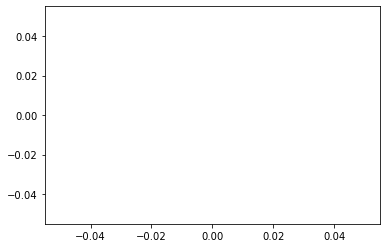

In [4]:
plt.plot()

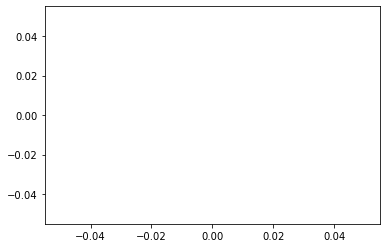

In [5]:
plt.plot()
plt.show()

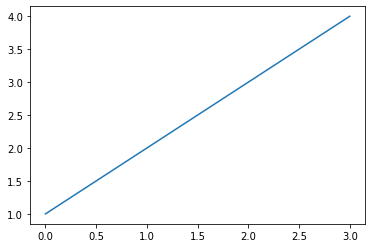

In [6]:
plt.plot([1, 2, 3, 4]);

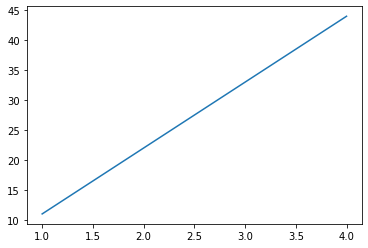

In [8]:
x = [1, 2, 3, 4]
y = [11, 22, 33, 44]
plt.plot(x, y);

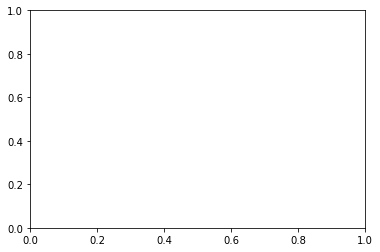

In [12]:
# 1st method
fig = plt.figure() # creates a figure
ax = fig.add_subplot() # adds some axes
plt.show()

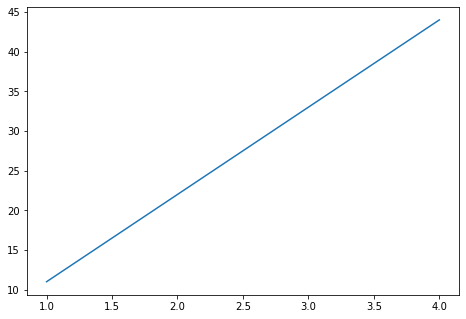

In [15]:
# 2nd method
fig = plt.figure() # creates a figure
ax = fig.add_axes([1, 1, 1, 1]) # adds some axes
ax.plot(x, y)
plt.show()

(matplotlib.figure.Figure, matplotlib.axes._subplots.AxesSubplot)

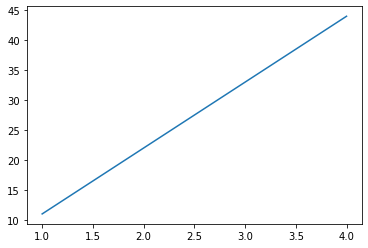

In [17]:
# 3rd method (recommended)
fig, ax = plt.subplots()
ax.plot(x, y); # add some data
type(fig), type(ax)

# Matplotlib example workflow

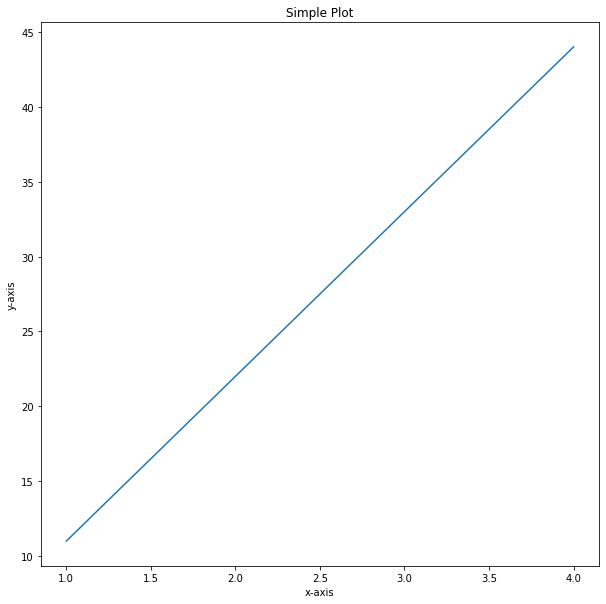

In [19]:
# 0. import lib
%matplotlib inline
import matplotlib.pyplot as plt

# 1. Prepare data
x = [1, 2, 3, 4]
y = [11, 22, 33, 44]

# 2. Setup plot
fig, ax = plt.subplots(figsize=(10, 10)) # (width, height)

# 3. Plot data
ax.plot(x, y)

# 4. Customize plot
ax.set(title="Simple Plot",
      xlabel="x-axis",
      ylabel="y-axis")

# 5. Save & show (you save the whole figure)
fig.savefig("images/sample-plot.png")

## Making figures with NumPy arrays

We want:
* Line plot
* Scatter plot
* Bar plot
* Histogram
* Subplots

In [20]:
import numpy as np

In [23]:
# Create some data
x = np.linspace(0, 10, 100)
x[:10]

array([0.        , 0.1010101 , 0.2020202 , 0.3030303 , 0.4040404 ,
       0.50505051, 0.60606061, 0.70707071, 0.80808081, 0.90909091])

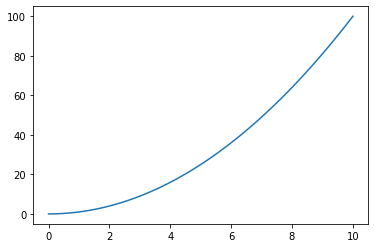

In [25]:
# Plot the data
fig, ax = plt.subplots()
ax.plot(x, x**2);

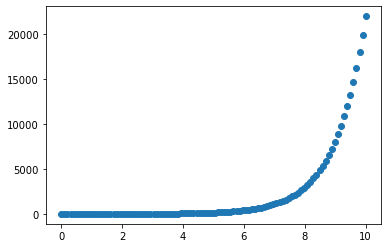

In [27]:
# Use same data to make a scatter
fig, ax = plt.subplots()
ax.scatter(x, np.exp(x));

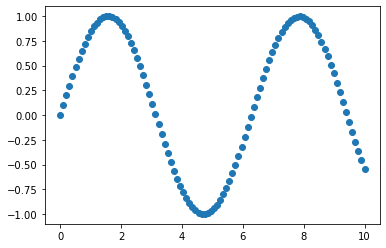

In [28]:
# Another scatter plot
fig, ax = plt.subplots()
ax.scatter(x, np.sin(x));

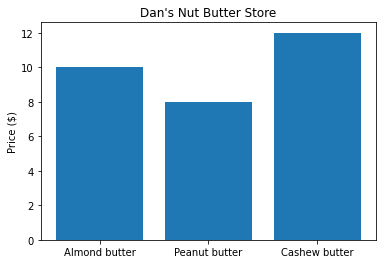

In [2]:
# Make a plot from dictionary
nut_butter_prices = {"Almond butter": 10,
                    "Peanut butter": 8,
                    "Cashew butter": 12,}
fix, ax = plt.subplots()
ax.bar(nut_butter_prices.keys(), height=nut_butter_prices.values());
ax.set(title="Dan's Nut Butter Store",
      ylabel="Price ($)");

<BarContainer object of 3 artists>

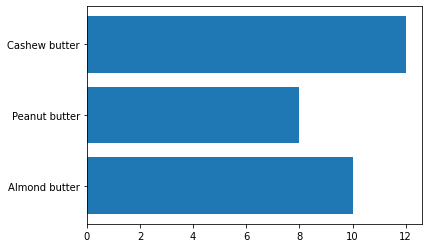

In [4]:
fig, ax = plt.subplots()
ax.barh(list(nut_butter_prices.keys()), list(nut_butter_prices.values()))

In [6]:
nut_butter_prices.keys()

dict_keys(['Almond butter', 'Peanut butter', 'Cashew butter'])

In [7]:
list(nut_butter_prices.keys())

['Almond butter', 'Peanut butter', 'Cashew butter']

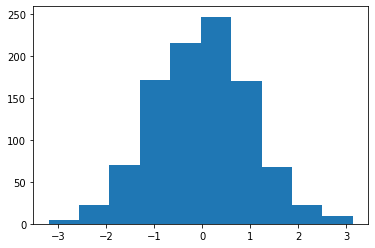

In [8]:
# Make some data for histograms and plot it!!
x = np.random.randn(1000)
fig, ax = plt.subplots()
ax.hist(x);

# Two options for subplots

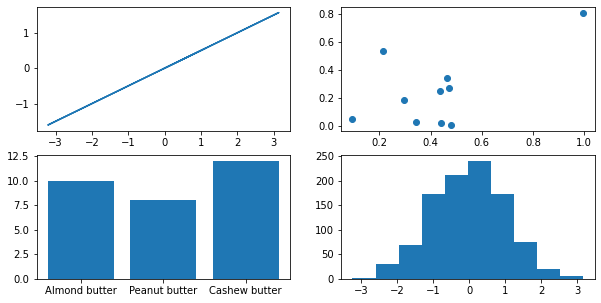

In [15]:
# Subplot option 1
fix, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,
                                            ncols=2,
                                            figsize=(10, 5))

# Plot to each different axis
ax1.plot(x, x/2);
ax2.scatter(np.random.random(10), np.random.random(10));
ax3.bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax4.hist(np.random.randn(1000));

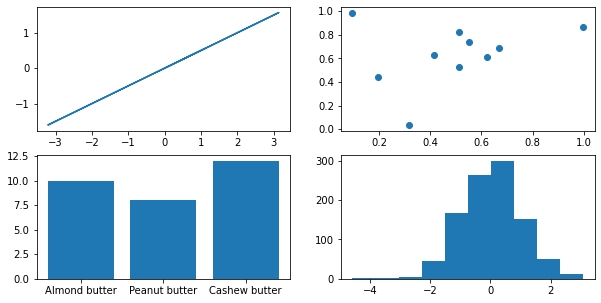

In [17]:
# Subplots option 2
fig, ax = plt.subplots(nrows=2,
                      ncols=2,
                      figsize=(10, 5))

# Plot to each differencent index
ax[0, 0].plot(x, x/2);
ax[0, 1].scatter(np.random.random(10), np.random.random(10));
ax[1, 0].bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax[1, 1].hist(np.random.randn(1000));

## Plotting from pandas DataFrames

In [18]:
import pandas as pd

In [19]:
# Make a dataframe
car_sales = pd.read_csv("car-sales.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


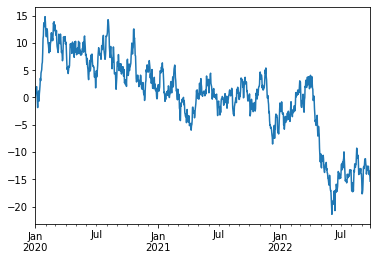

In [23]:
ts = pd.Series(np.random.randn(1000),
              index=pd.date_range("1/1/2020", periods=1000))
ts = ts.cumsum()
ts.plot();

In [25]:
car_sales["Price"] = car_sales["Price"].str.replace('[\$\,\.]', '', regex=True)
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,400000
1,Honda,Red,87899,4,500000
2,Toyota,Blue,32549,3,700000
3,BMW,Black,11179,5,2200000
4,Nissan,White,213095,4,350000
5,Toyota,Green,99213,4,450000
6,Honda,Blue,45698,4,750000
7,Honda,Blue,54738,4,700000
8,Toyota,White,60000,4,625000
9,Nissan,White,31600,4,970000


In [26]:
# Remove last two zeros
car_sales["Price"] = car_sales["Price"].str[:-2]
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500
5,Toyota,Green,99213,4,4500
6,Honda,Blue,45698,4,7500
7,Honda,Blue,54738,4,7000
8,Toyota,White,60000,4,6250
9,Nissan,White,31600,4,9700


In [27]:
car_sales["Sale Date"] = pd.date_range("1/1/2020", periods=len(car_sales))
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date
0,Toyota,White,150043,4,4000,2020-01-01
1,Honda,Red,87899,4,5000,2020-01-02
2,Toyota,Blue,32549,3,7000,2020-01-03
3,BMW,Black,11179,5,22000,2020-01-04
4,Nissan,White,213095,4,3500,2020-01-05
5,Toyota,Green,99213,4,4500,2020-01-06
6,Honda,Blue,45698,4,7500,2020-01-07
7,Honda,Blue,54738,4,7000,2020-01-08
8,Toyota,White,60000,4,6250,2020-01-09
9,Nissan,White,31600,4,9700,2020-01-10


In [30]:
car_sales["Price"] = car_sales["Price"].astype(int)
car_sales["Total Sales"] = car_sales["Price"].cumsum()
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2020-01-01,4000
1,Honda,Red,87899,4,5000,2020-01-02,9000
2,Toyota,Blue,32549,3,7000,2020-01-03,16000
3,BMW,Black,11179,5,22000,2020-01-04,38000
4,Nissan,White,213095,4,3500,2020-01-05,41500
5,Toyota,Green,99213,4,4500,2020-01-06,46000
6,Honda,Blue,45698,4,7500,2020-01-07,53500
7,Honda,Blue,54738,4,7000,2020-01-08,60500
8,Toyota,White,60000,4,6250,2020-01-09,66750
9,Nissan,White,31600,4,9700,2020-01-10,76450


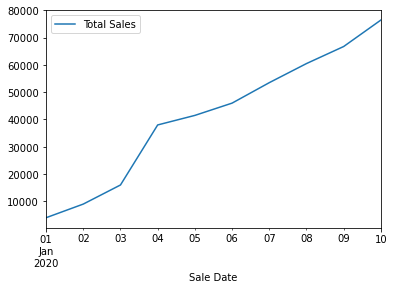

In [29]:
# Let's plot the total sales
car_sales.plot(x="Sale Date", y="Total Sales");

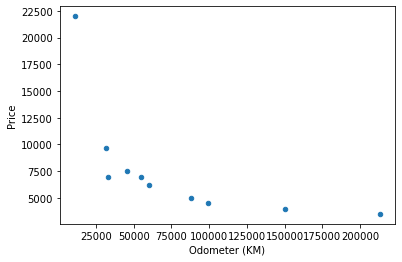

In [31]:
car_sales.plot(x="Odometer (KM)", y="Price", kind="scatter");

In [33]:
x = np.random.rand(10, 4)
df = pd.DataFrame(x, columns=['a', 'b', 'c', 'd'])
df

,a,b,c,d
0,0.681709,0.414692,0.447330,0.112239
1,0.859754,0.154586,0.229048,0.491513
2,0.949388,0.075203,0.613200,0.347441
3,0.962227,0.397750,0.489609,0.701715
4,0.625993,0.259142,0.234140,0.324006
5,0.214646,0.144829,0.971858,0.912015
6,0.323743,0.316791,0.699260,0.824470
7,0.795915,0.207826,0.101135,0.288560
8,0.095250,0.683335,0.611981,0.102371
9,0.872896,0.702719,0.442337,0.121087


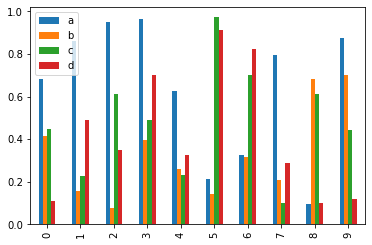

In [34]:
df.plot.bar();

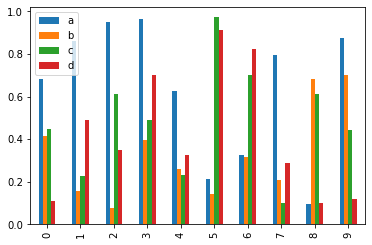

In [35]:
df.plot(kind="bar");

In [36]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2020-01-01,4000
1,Honda,Red,87899,4,5000,2020-01-02,9000
2,Toyota,Blue,32549,3,7000,2020-01-03,16000
3,BMW,Black,11179,5,22000,2020-01-04,38000
4,Nissan,White,213095,4,3500,2020-01-05,41500
5,Toyota,Green,99213,4,4500,2020-01-06,46000
6,Honda,Blue,45698,4,7500,2020-01-07,53500
7,Honda,Blue,54738,4,7000,2020-01-08,60500
8,Toyota,White,60000,4,6250,2020-01-09,66750
9,Nissan,White,31600,4,9700,2020-01-10,76450


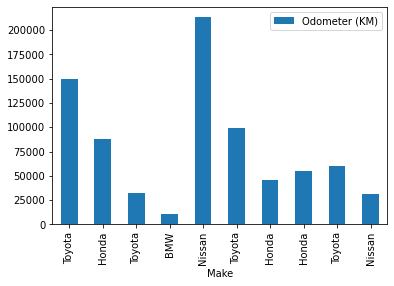

In [37]:
car_sales.plot(x="Make", y="Odometer (KM)", kind="bar");

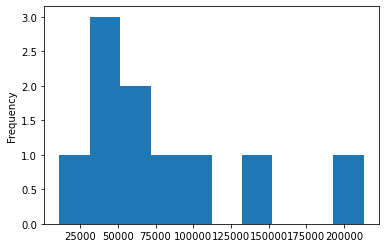

In [38]:
# Histograms
car_sales["Odometer (KM)"].plot.hist();

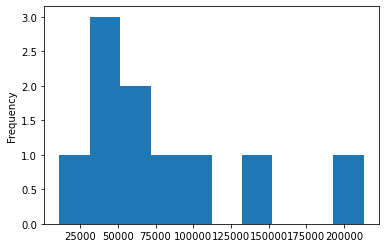

In [39]:
car_sales["Odometer (KM)"].plot(kind="hist");

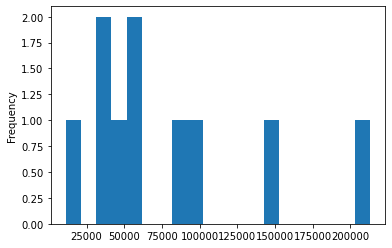

In [40]:
car_sales["Odometer (KM)"].plot.hist(bins=20);

In [3]:
# Try on another dataset
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


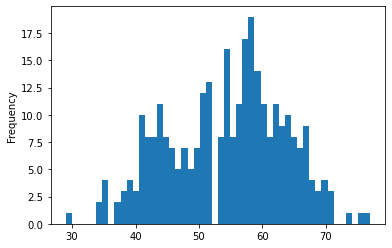

In [8]:
# Create a histogram of age
heart_disease["age"].plot.hist(bins=50);

In [9]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


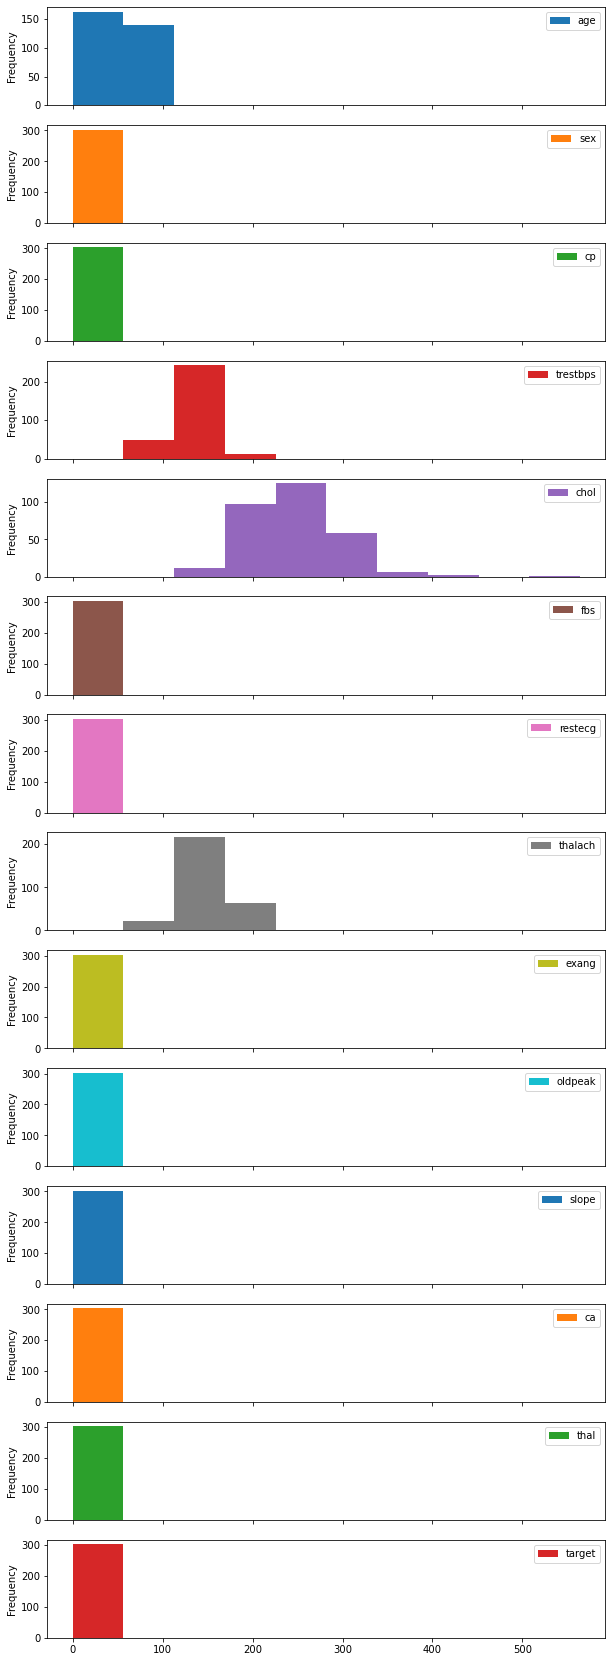

In [12]:
# 'figsize' is avoid Ovrlap of each chart
heart_disease.plot.hist(figsize=(10, 30), subplots=True);

### Which one should you use? (pyplot vs matplotlib OO method?)

* When plotting something quickly, ok to use the pyplot method
* When plotting something more advanced, use the OO method

In [13]:
over_50 = heart_disease[heart_disease["age"] > 50]
over_50.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


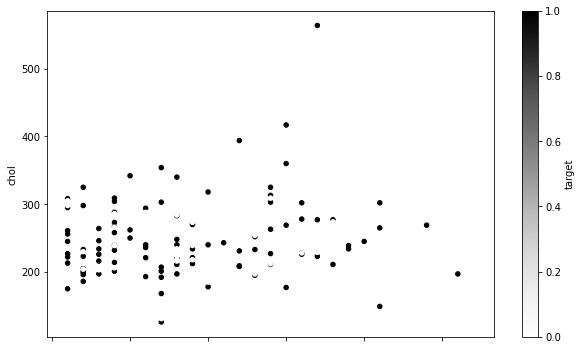

In [17]:
# Pyplot method
over_50.plot(kind='scatter',
            x='age',
            y='chol',
            c='target',
            figsize=(10, 6));

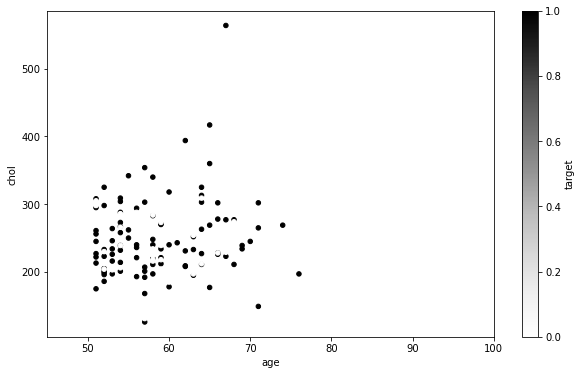

In [20]:
# OO method mixed with pyplot method
fig, ax = plt.subplots(figsize=(10, 6));
over_50.plot(kind='scatter',
            x='age',
            y='chol',
            c='target',
            ax=ax);

ax.set_xlim([45, 100]);

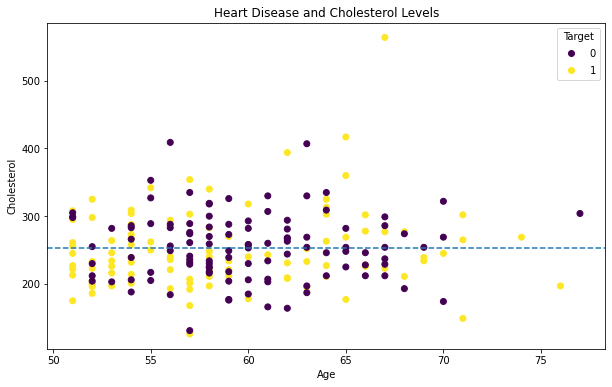

In [29]:
## OO method from scratch
fig, ax =plt.subplots(figsize=(10, 6))

# Plot the data
scatter = ax.scatter(x=over_50["age"],
                    y=over_50["chol"],
                    c=over_50["target"]);

# Customize the plot
ax.set(title="Heart Disease and Cholesterol Levels",
      xlabel="Age",
      ylabel="Cholesterol");

# Add a legend
ax.legend(*scatter.legend_elements(), title="Target");

# Add a horicontal line
ax.axhline(over_50["chol"].mean(),
          linestyle='--');

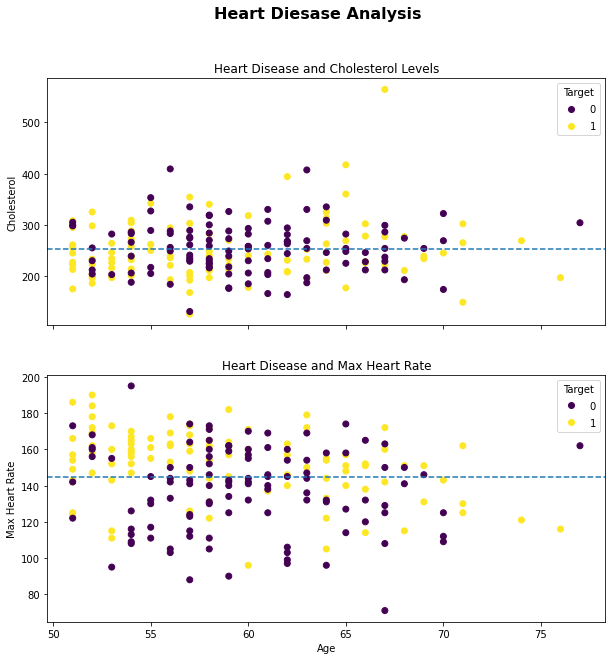

In [36]:
fig, (ax0, ax1) =plt.subplots(nrows=2,
                             ncols=1,
                             figsize=(10, 10),
                             sharex=True);

# Add data to ax0
scatter0 = ax0.scatter(x=over_50["age"],
                    y=over_50["chol"],
                    c=over_50["target"]);
# Customize ax0
ax0.set(title="Heart Disease and Cholesterol Levels",
#       xlabel="Age", # set 'sharex' is true
      ylabel="Cholesterol");

# Add a legend to ax0
ax0.legend(*scatter.legend_elements(), title="Target");

# Add a meanline to ax0
ax0.axhline(over_50["chol"].mean(),
          linestyle='--');

# Add data to ax1
scatter1 = ax1.scatter(x=over_50["age"],
                    y=over_50["thalach"],
                    c=over_50["target"]);
# Customize ax1
ax1.set(title="Heart Disease and Max Heart Rate",
      xlabel="Age",
      ylabel="Max Heart Rate");

# Add a legend to ax1
ax1.legend(*scatter.legend_elements(), title="Target");

# Add a meanline to ax1
ax1.axhline(over_50["thalach"].mean(),
          linestyle='--');

# Add a title to the figure
fig.suptitle("Heart Diesase Analysis", fontsize=16, fontweight="bold");